In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [72]:
df = pd.read_csv('./data/placement-dataset.csv')
df = df.dropna(subset=['iq','cgpa'])
df = df.iloc[:,1:]

print(df.size)
print(df.head())


264
   cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
3   7.4  132.0          1
4   5.8  142.0          0
5   7.1   48.0          1


In [73]:
x = df.iloc[:,0:2]
print(x.head())

y = df.iloc[:,2:]
print(y.head())

   cgpa     iq
0   6.8  123.0
1   5.9  106.0
3   7.4  132.0
4   5.8  142.0
5   7.1   48.0
   placement
0          1
1          0
3          1
4          0
5          1


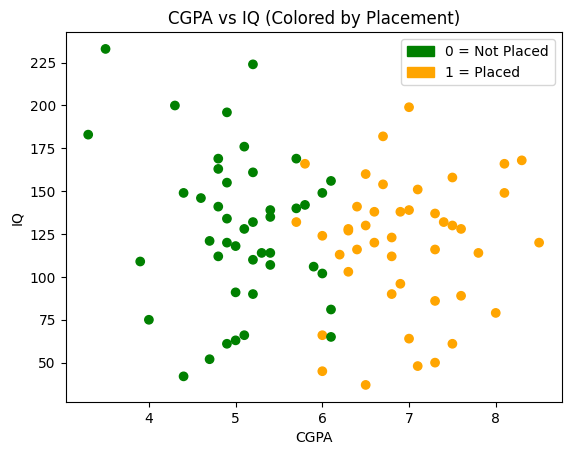

In [74]:
colors = ['orange' if val == 1 else 'green' for val in y['placement']]

legend_handles = [
    mpatches.Patch(color='green', label='0 = Not Placed'),
    mpatches.Patch(color='orange', label='1 = Placed')
]

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color=colors)
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("CGPA vs IQ (Colored by Placement)")
plt.legend(handles=legend_handles)
plt.show()


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.1, random_state=0)

print("x_train size:", x_train.shape)
print("x_test size:", x_test.shape)
print("y_train size:", y_train.shape)
print("y_test size:", y_test.shape)


x_train size: (8, 2)
x_test size: (80, 2)
y_train size: (8, 1)
y_test size: (80, 1)


In [76]:

sc_x = StandardScaler()
x_train_scaled = sc_x.fit_transform(x_train)
x_test_scaled = sc_x.transform(x_test)

x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
print(x_train_scaled_df.head())


       cgpa        iq
0  0.874557 -0.537408
1  0.368789  1.662214
2  0.284494  0.442424
3 -1.822871 -1.477246
4  0.621673 -1.317274


In [77]:
reg = LinearRegression()
reg.fit(x_train_scaled, y_train)
y_pred = reg.predict(x_train_scaled)

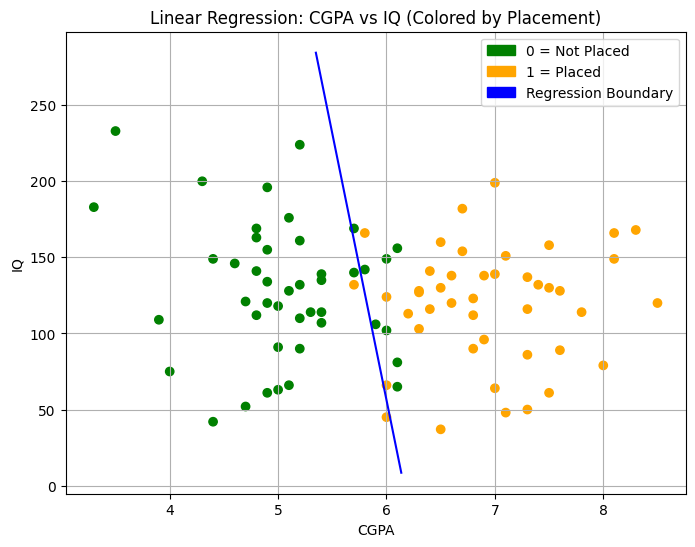

In [ ]:
cgpa_vals = np.linspace(x['cgpa'].min(), x['cgpa'].max(), 100)
iq_vals = []

for cgpa in cgpa_vals:
    scaled_cgpa = (cgpa - sc_x.mean_[0]) / sc_x.scale_[0]
    denom = reg.coef_[0][1]

    scaled_iq = (0.5 - reg.intercept_ - reg.coef_[0][0]*scaled_cgpa) / denom
    iq = scaled_iq * sc_x.scale_[1] + sc_x.mean_[1]
    iq_vals.append(iq)

cgpa_vals = np.array(cgpa_vals)
iq_vals = np.array(iq_vals)
mask = ((iq_vals < 300) & (iq_vals > 0)).flatten() 

cgpa_filtered = cgpa_vals[mask]
iq_filtered = iq_vals[mask]
plt.figure(figsize=(8, 6))
plt.scatter(x['cgpa'], x['iq'], color=colors)
plt.plot(cgpa_filtered, iq_filtered, color='blue', label='Decision Line (y=0.5)')
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Linear Regression: CGPA vs IQ (Colored by Placement)")
plt.legend(handles=legend_handles + [mpatches.Patch(color='blue', label='Regression Boundary')])
plt.grid(True)
plt.show()

